## Breadth-First Search

`Breadth-First Search` adalah algoritma `Blind/Un-informed Search` karena memang tidak ada informasi yang digunakan dalam proses pencarian. Pencarian menggunakan algoritma BFS ini dilakukan pada semua simpul dalam setiap level secara berurutan dari kiri ke kanan. Jika pada level pertama tidak ditemukan solusi maka akan diteruskan kepada level berikutnya.

BFS adalah _complete_ dan _optimal_ tetapi BFS harus menyimpan semua simpul yang pernah dibangkitkan. Misalkan, untuk $b$ = 10 dan $d$ = 8, maka kita harus membangkitkan dan menyimpan sebanyak $10^0 + 10^1 + 10^2 + 10^3 + 10^4 + 10^5 + 10^6 + 10^7 + 10^8 = 111.111.111.$

**Algoritma BFS**

```
1. Masukkan simpul ujung (akar) ke dalam antrian.
2. Ambil simpul dari awal antrian, lalu cek apakah simpul merupakan solusi.
3. Jika simpul merupakan solusi, pencarian selesai dan hasil dikembalikan.
4. Jika simpul bukan solusi, masukkan seluruh simpul yang bertetangga dengan simpul tersebut (simpul anak) ke dalam antrian.
5. Jika antrian kosong dan setiap simpul sudah dicek, pencarian selesai dan mengembalikan hasil solusi tidak ditemukan.
6. Ulangi pencarian dari langkah kedua.
Singkatnya, misal ada antrian A D F H, maka dalam bfs yang diambil terlebih dahulu adalah A.
```

Referensi: [https://student.blog.dinus.ac.id/agustintyaz/2017/04/26/bfsbreatdh-first-search-dan-dfsdepth-first-search/]

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import time

In [14]:
def bfs (graf, mulai, tujuan):
    queue = [[mulai]]
    visited = set()
    
    g = nx.Graph()
    g.clear()
    g.add_nodes_from(graf)
    
    tic = time.perf_counter()
    
    while queue:
        
        jalur = queue.pop(0)
        state = jalur[-1]
        
        if state == tujuan: #Jika simpul adalah solusi, maka akan mengembalikan solusi sekarang    
            print(f"Jalur sekarang ({state}) == tujuan ({tujuan})")
            toc = time.perf_counter()
            print(f"Selesai pada {toc - tic:0.4f} detik")
            return jalur
        elif state not in visited:
            for cabang in graf.get(state, []):
                edge = (state, cabang)
                g.add_edges_from([edge])
                pos = nx.spring_layout(g, pos=nx.random_layout(g, seed=1))
                nx.draw_networkx(g, pos, with_labels=True, edge_color='r')

                plt.title("Pergerakan Node ")
                plt.show()
    
                jalur_baru = list(jalur)
                jalur_baru.append(cabang)
                queue.append(jalur_baru)
                
            visited.add(state)            
            
        isi = len(queue)
        if isi == 0:
            print("Tidak ditemukan")

In [15]:
graf = {'A':set(['B', 'C']),
       'B':set(['A']),
       'C':set(['A', 'D', 'E', 'F']),
       'D':set(['C', 'G', 'H']),
       'E':set(['C', 'F', 'I']),
       'F':set(['C', 'E', 'K']),
       'G':set(['D', 'H', 'I']),
       'H':set(['D', 'G']),
       'I':set(['E', 'G', 'J']),
       'J':set(['I', 'L']),
       'K':set(['F', 'L']),
       'L':set(['K', 'J'])}

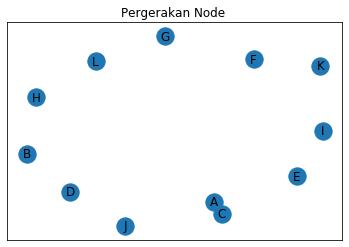

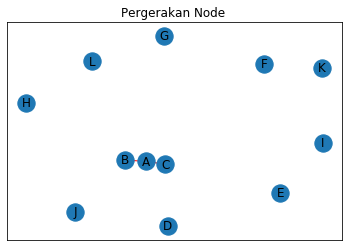

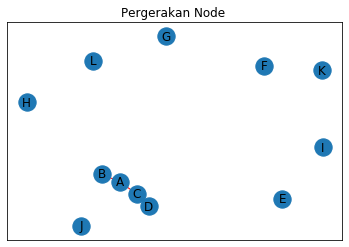

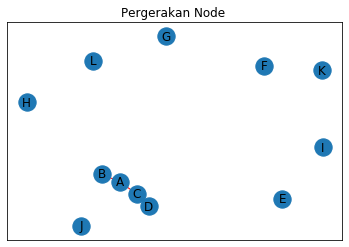

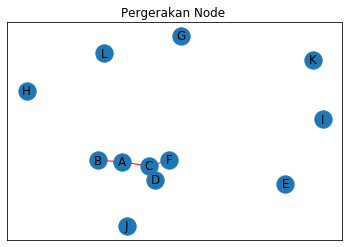

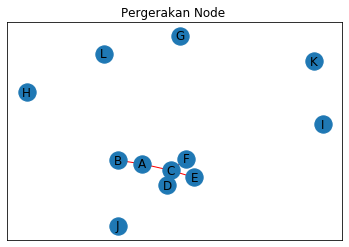

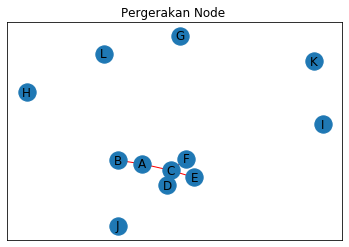

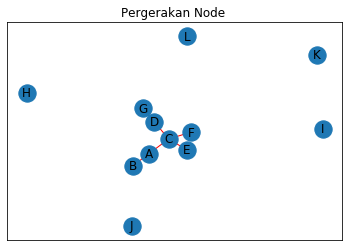

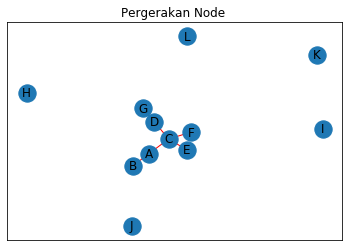

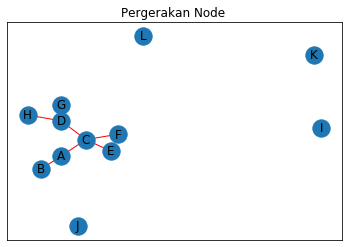

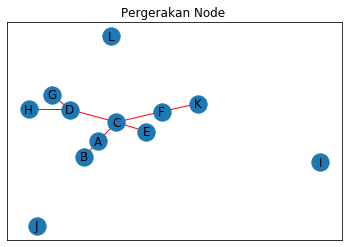

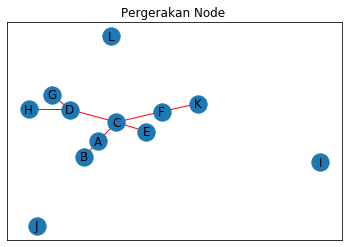

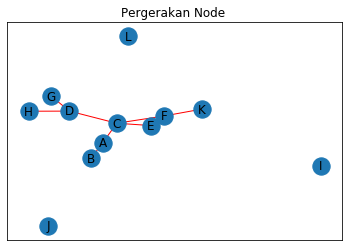

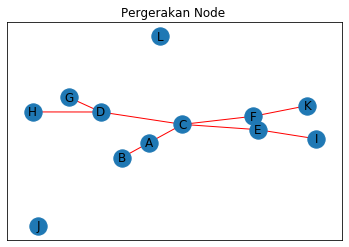

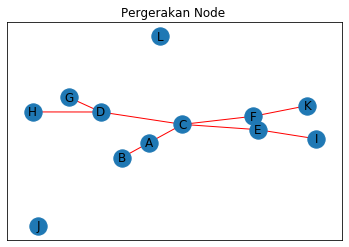

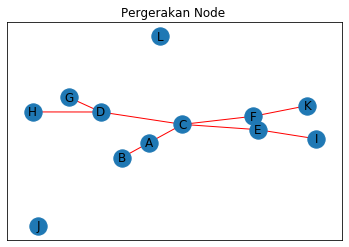

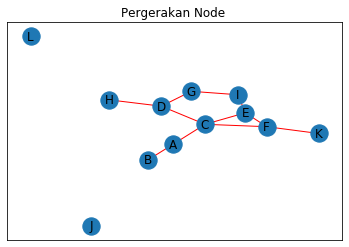

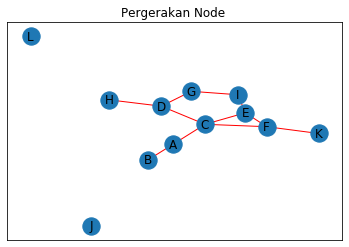

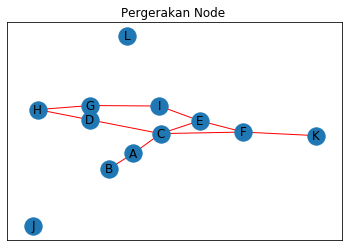

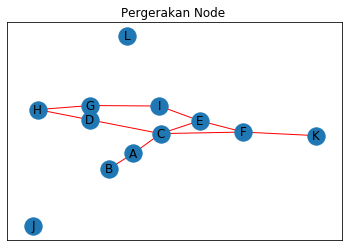

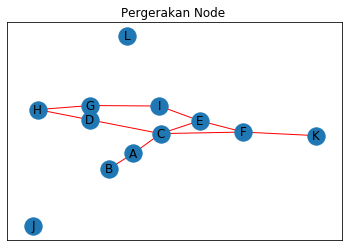

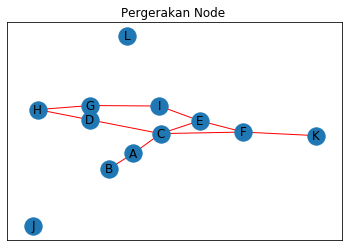

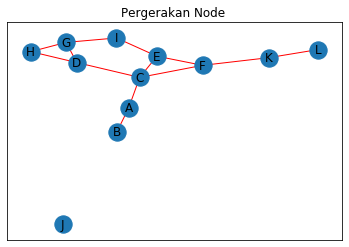

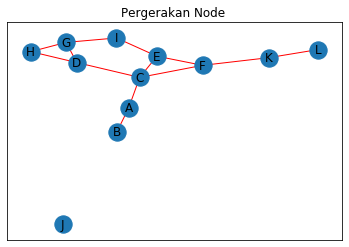

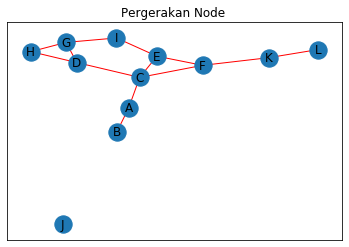

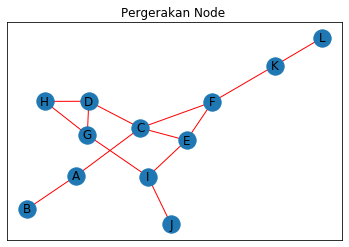

Jalur sekarang (L) == tujuan (L)
Selesai pada 11.9498 detik


['A', 'C', 'F', 'K', 'L']

In [16]:
bfs(graf, 'A', 'L')